<a href="https://colab.research.google.com/github/Fcazarez/RRC3_IntroAI_P4_spamDetector_genreClassificator/blob/main/IntroAI_P4_Spam_Classifier_with_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **`COMP-3703 (241551) Introduction to Artificial Intelligence`**
# **Project 4 - Text Classification-Spam and Ham and TF-IDF**
# **Felix Cazarez**

**Oberview:**

In this part of the assignment, you will develop a neural network spam classifier using comments from YouTube videos. The classifier will distinguish between spam and non-spam comments. You will use Python, Keras for neural network modeling, and Pandas for data manipulation. This assignment will guide you through data preparation, model construction, and evaluation. You are free to answer the questions as you wish, you need not follow the instructions explicitly, but you must carry out the same tasks and provide the same outputs.

# Import

In [1]:
# import libraries

import pandas as pd
import numpy as np

from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler
from keras.utils import to_categorical


# `1 Data Loading and Preparation`

##Task: Load and concatenate data from multiple CSV files using Pandas.

* Load comments from five CSV files named Youtube01-Psy.csv, Youtube02-
KatyPerry.csv, Youtube03-LMFAO.csv, Youtube04-Eminem.csv, and Youtube05-
Shakira.csv.


In [2]:
# get files url
git_url_psy = 'https://raw.githubusercontent.com/Fcazarez/RRC3_IntroAI_Project3_Text_Classification_Spam/main/Youtube01-Psy.csv'
df_psy = pd.read_csv (git_url_psy)
git_url_kate = 'https://raw.githubusercontent.com/Fcazarez/RRC3_IntroAI_Project3_Text_Classification_Spam/main/Youtube02-KatyPerry.csv'
df_kate = pd.read_csv (git_url_kate)
git_url_lmfao = 'https://raw.githubusercontent.com/Fcazarez/RRC3_IntroAI_Project3_Text_Classification_Spam/main/Youtube03-LMFAO.csv'
df_lmfao = pd.read_csv (git_url_lmfao)
git_url_eminem = 'https://raw.githubusercontent.com/Fcazarez/RRC3_IntroAI_Project3_Text_Classification_Spam/main/Youtube04-Eminem.csv'
df_eminem = pd.read_csv (git_url_eminem)
git_url_shakira = 'https://raw.githubusercontent.com/Fcazarez/RRC3_IntroAI_Project3_Text_Classification_Spam/main/Youtube05-Shakira.csv'
df_shakira = pd.read_csv (git_url_shakira)

In [3]:
concat_df = pd.concat([df_psy, df_kate, df_lmfao, df_eminem, df_shakira])

In [4]:
# shuffle
shuffled_df = concat_df.sample(frac=1, random_state=0).reset_index(drop=True)
display(shuffled_df.sample(5))

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
317,z12xituo3vvdxvrhk04cdxmilwfwhfdgmz00k,moilovemoi,2014-09-09T22:34:28,ROAAAAARRRRRR 🐯🐯🐯﻿,0
833,z12hxjxqlu2bifvq204cgbggameftpswvfw,Paul Lewis,2014-11-07T15:05:25,"""....because I AM a champion...and you're gonn...",0
448,_2viQ_Qnc680Rh_y5Dlwtkr_llWVOG7ZQdmNVip_dno,Minh Lý,2013-10-02T12:15:58.210000,i like and love so much people all friends.......,0
806,z13ezr0rmk2kxz0rr04ch1iids2nhnnglh4,Maria Martinez,2014-10-12T03:13:00.872000,Check out this video on YouTube:﻿,1
1161,z12ujdnhpwroej3rd04cgrlguunjdnfwmkc0k,Bo Lanciné MAGASSOUBA,2015-05-28T11:47:37.722000,"WE GO FOR 1,000,000,000 FOR EMINEM﻿",0


In [5]:
shuffled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 76.5+ KB


> # **`2 Setting Up cross-validation`**
## Implement Stratified K-Fold Cross-Validation.

* Use the StratifiedKFold class from sklearn.model_selection to create cross-
validation splits. Set the number of splits to 5.
*  Ensure that the splits are stratified based on the CLASS column in your DataFrame.
* Output the pair train,test indices from your splits in the previous task. train contains the indices of the dataset that should be used for training in this particular split. test contains the indices of the dataset that should be used for testing in this particular split.
* The loop should print “split to indicate the start of a new split formation, then prints test indices. Sample output is given by

In [6]:
# 'CLASS' is the column used for stratified sampling
stratify_column = 'CLASS'

# X contains the features (all columns except the 'CLASS' column)
X = shuffled_df.drop(columns=[stratify_column])

# y contains the target variable ('CLASS' column)
y = shuffled_df[stratify_column]

# Using StratifiedKFold for cross-validation
# n_splits=5: The dataset is divided into 5 folds
# shuffle=True: The data is shuffled before splitting into folds
# random_state=42: Ensures reproducibility by fixing the random seed
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



In [7]:
print(f'Features shape is: {X.shape} and target shape is: {y.shape}')

Features shape is: (1956, 4) and target shape is: (1956,)


In [8]:
# Lists to store the indices of training and testing sets for each split
train_indices_list = []
test_indices_list = []

# Iterate over the splits generated by StratifiedKFold
for split, (train_idx, test_idx) in enumerate(stratified_kfold.split(X, y), start=1):
    # Display information about the current split
    print(f"Split {split}")

    # Display the indices of the training set for the current split
    print("Train indices:", train_idx)
    print(f'Train {split} shape: ', train_idx.shape)
    print("="*60)
    print("\n")

    # Display the indices of the testing set for the current split
    print("Test indices:", test_idx)
    print(f'Test {split} shape: ', test_idx.shape)

    # Print a newline for better readability
    print("="*60)
    print("\n")

    # Append the training and testing indices to their respective lists
    train_indices_list.append(train_idx)
    test_indices_list.append(test_idx)



Split 1
Train indices: [   0    1    2 ... 1952 1953 1954]
Train 1 shape:  (1564,)


Test indices: [  13   19   21   29   31   36   41   45   50   56   58   64   68   74
   75   78   82   85   90   95   96   98  100  101  103  107  108  112
  114  122  128  140  141  143  155  156  158  163  192  194  198  214
  215  217  247  261  264  272  278  281  286  287  293  300  314  316
  330  341  353  357  363  378  380  390  395  399  403  408  411  416
  417  420  422  427  429  433  436  441  444  448  449  450  456  459
  461  477  486  488  489  490  496  499  502  503  505  511  519  526
  527  542  545  548  557  567  579  590  591  592  594  596  597  599
  605  629  631  633  635  649  650  652  657  659  663  670  673  676
  678  683  684  687  688  694  695  698  704  707  709  710  712  718
  725  727  729  732  735  737  742  743  749  756  757  763  766  767
  778  782  785  787  789  801  802  815  818  832  833  836  853  858
  860  862  867  873  874  881  883  890  891  89

# > **`3 Tokenization and Text-to-Matrix Conversion`**
###Convert text data into a numerical format suitable for a neural network.
* Create a function prepare_data that takes indices for training and testing data.
* Use the Tokenizer from keras.preprocessing.text to tokenize the text comments.
* Limit the number of words to 2000.
* Convert the text comments to a TF-IDF matrix format

In [9]:
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

def prepare_data(train_indices, test_indices, texts):

    # Extract training and testing data based on indices
    train_data = texts.iloc[train_indices]
    test_data = texts.iloc[test_indices]

    # Initialize tokenizer with num_words=2000
    tokenizer = Tokenizer(num_words=2000)

    # Fit tokenizer on training data
    tokenizer.fit_on_texts(train_data['CONTENT'])

    # Convert text comments to TF-IDF matrix format
    tfidf_vectorizer = TfidfVectorizer(max_features=2000)

    # Transform training and testing data to TF-IDF matrix
    X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['CONTENT'])
    X_test_tfidf = tfidf_vectorizer.transform(test_data['CONTENT'])

    return X_train_tfidf, X_test_tfidf



In [10]:
# Extract indices for the second split (split index 1) from the lists
train_indices = train_indices_list[1]
test_indices = test_indices_list[1]

# Call the prepare_data function with the extracted indices and the original DataFrame
X_train_tfidf, X_test_tfidf = prepare_data(train_indices, test_indices, shuffled_df)



In [11]:

print('The Training  TF-IFD is: ', X_train_tfidf.shape)
print('The Testing  TF-IFD is: ', X_test_tfidf.shape)

The Training  TF-IFD is:  (1565, 2000)
The Testing  TF-IFD is:  (391, 2000)


#**`4 Data Preprocessing`**
## Task: Normalize the TF-IDF matrix.
* Divide the matrix by its maximum absolute value.
* Subtract the mean from the matrix

In [12]:
from sklearn.preprocessing import MaxAbsScaler

# Create an instance of MaxAbsScaler
max_abs_scaler = MaxAbsScaler()

# Normalize using max abs value
X_train_maxabs = max_abs_scaler.fit_transform(X_train_tfidf)
X_test_maxabs = max_abs_scaler.transform(X_test_tfidf)

# Divide the matrix by its maximum absolute value
X_train_maxabs /= abs(X_train_maxabs).max()
X_test_maxabs /= abs(X_test_maxabs).max()

# Subtract the mean from the matrix
mean_value = X_train_maxabs.mean(axis=0)
X_train_maxabs -= mean_value
X_test_maxabs -= mean_value

# Print the shapes of the normalized matrices
print("Shape of X_train_maxabs:", X_train_maxabs.shape)
print("Shape of X_test_maxabs:", X_test_maxabs.shape)




Shape of X_train_maxabs: (1565, 2000)
Shape of X_test_maxabs: (391, 2000)


# 5 Building the Neural Network Model
### Task: Define and compile a neural network model.
* Use the Sequential model from Keras.
* Add a Dense layer with 512 units and 'relu' activation, followed by a Dropout layer with
0.5 dropout rate.
* Add another Dense layer for classification and use 'softmax' activation.
* Compile the model with 'categorical_crossentropy' loss and 'adamax' optimizer

In [13]:
input_shape = X_train_maxabs.shape[1]
input_shape

2000

In [14]:
# function to create the model
def create_model(input_shape, num_classes):
    # sequential model
    model = Sequential()

    # Dense layer with 512 units and 'relu' activation
    model.add(Dense(512, activation='relu', input_shape=(input_shape,)))

    # dropout layer with 0.5 dropout rate
    model.add(Dropout(0.5))

    # another dense layer 'softmax' activation
    model.add(Dense(num_classes, activation='softmax'))

    # complile the model
    model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])

    # model summary
    model.summary()

    return model

> # **`6 Model Training and Evaluation`**
### Task: Train and evaluate the model.
* Write a function train_and_test that takes training and testing indices.
* Train the model on the training data and evaluate it on the test data.
* Use the accuracy metric to evaluate the model's performance

In [15]:
from tabulate import tabulate

accuracy_scores = []

def train_and_test(train_indices, test_indices, X_train, y_train, X_test, y_test, epochs=20, batch_size=64):
    # Get the number of features (input shape) from the training data
    input_shape = X_train.shape[1]

    # Define the number of classes (assumed to be 2)
    num_classes = 2

    # Create the neural network model using a function called create_model
    model = create_model(input_shape, num_classes)

    # Convert labels to categorical format (one-hot encoding)
    y_train_categorical = to_categorical(y_train, num_classes=num_classes)
    y_test_categorical = to_categorical(y_test, num_classes=num_classes)

    # Train the model on the training data
    history = model.fit(X_train, y_train_categorical, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.1)

    # Evaluate the model on the test data
    results_model = model.evaluate(X_test, y_test_categorical, verbose=0)

    # Print loss and accuracy for each epoch during training
    for epoch, acc in enumerate(history.history['accuracy']):
        print(f'Epoch {epoch + 1} - Loss: {history.history["loss"][epoch]}, Accuracy: {acc}')

    # Print the final test accuracy
    print(f'\nTest Accuracy: {results_model[1]*100:.2f}%')

    # Append the test accuracy to the accuracy_scores list
    accuracy_scores.append(results_model[1])

    # Display results in a table
    table_results = [("Epoch", "Loss", "Accuracy")]
    for epoch, (loss, acc) in enumerate(zip(history.history["loss"], history.history["accuracy"])):
        table_results.append((epoch + 1, f'{loss:.4f}', f'{acc:.4f}'))

    # Define headers for the table
    headers = table_results[0]

    # Print the table using tabulate with "fancy_grid" format
    print(tabulate(table_results[1:], headers=headers, tablefmt="fancy_grid"))

    # Return the test accuracy
    return results_model[1]





In [16]:
# Based on StratifiedKFold get split number 1
split_number = 1

# Extract the training indices for split number 1
train_indices = train_indices_list[split_number]

# Extract the testing indices for split number 1
test_indices = test_indices_list[split_number]



In [17]:


accuracy = train_and_test(train_indices, test_indices, X_train_maxabs, y.iloc[train_indices], X_test_maxabs, y.iloc[test_indices])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1024512   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 1025538 (3.91 MB)
Trainable params: 1025538 (3.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
22/22 [==============================] - 2s 54ms/step - loss: 0.6198 - accuracy: 0.7656 - val_loss: 0.5703 - val_accuracy: 0.8535
Epoch 2/20
22/22 [==============================] - 1s 34ms/step - loss: 0.4914 - accuracy: 0.9084 - val_loss: 0.4742 - val_accuracy: 0.9045


> # **`7  Cross-Validation Scores`**
# Task: Calculate and print the mean and standard deviation of the cross-validation scores.
* Run the train_and_test function for each split in the cross-validation.
* Collect the accuracy scores from each run and calculate their mean and standard
deviation. Print the loss and accuracy output for each of the 10 epochs. Sample output for
a fold should look as follows
* Print the mean and standard deviation of all of these scores

In [18]:
train_indices_list

[array([   0,    1,    2, ..., 1952, 1953, 1954]),
 array([   1,    2,    3, ..., 1952, 1953, 1955]),
 array([   0,    3,    4, ..., 1952, 1954, 1955]),
 array([   0,    1,    2, ..., 1953, 1954, 1955]),
 array([   0,    1,    2, ..., 1953, 1954, 1955])]

In [19]:
for split_number in range(1, 5):
    train_indices = train_indices_list[split_number]
    test_indices = test_indices_list[split_number]

    # each split, train and store the accuracy
    accuracy = train_and_test(train_indices, test_indices, X_train_maxabs, y.iloc[train_indices], X_test_maxabs, y.iloc[test_indices])

    # Append accuracy score for this split
    accuracy_scores.append(accuracy)

    print(f"Accuracy for Split {split_number}: {accuracy}")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               1024512   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 1025538 (3.91 MB)
Trainable params: 1025538 (3.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
22/22 [==============================] - 2s 48ms/step - loss: 0.6324 - accuracy: 0.7592 - val_loss: 0.5858 - val_accuracy: 0.8981
Epoch 2/20
22/22 [==============================] - 1s 29ms/step - loss: 0.5103 - accuracy: 0.9233 - val_loss: 0.4899 - val_accuracy: 0.917

In [20]:
accuracy_scores

[0.4936061501502991,
 0.4910486042499542,
 0.4910486042499542,
 0.4884910583496094,
 0.4884910583496094,
 0.4859335124492645,
 0.4859335124492645,
 0.4526854157447815,
 0.4526854157447815]

In [21]:
#  mean and std dev for accuracy
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f"\nMean Accuracy: {mean_accuracy*100:.2f}%")
print(f"Standard Deviation of Accuracy: {std_accuracy*100:.2f}%")


Mean Accuracy: 48.11%
Standard Deviation of Accuracy: 1.54%


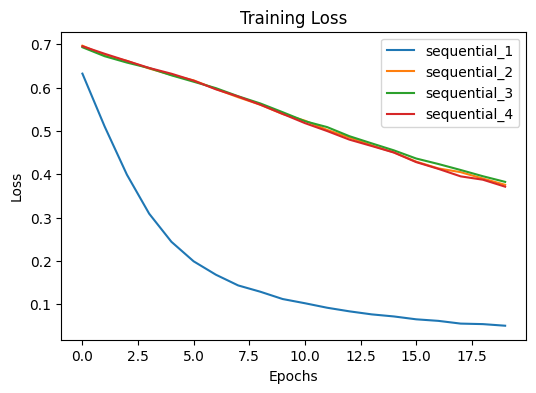

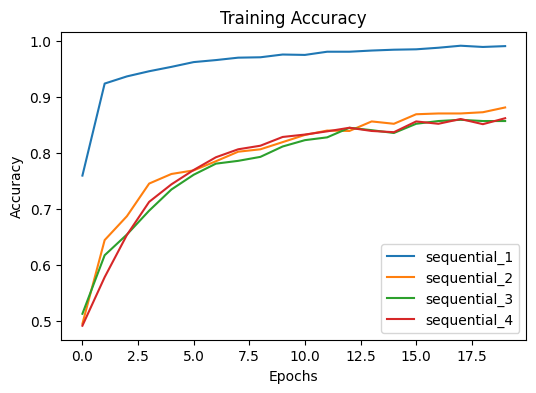

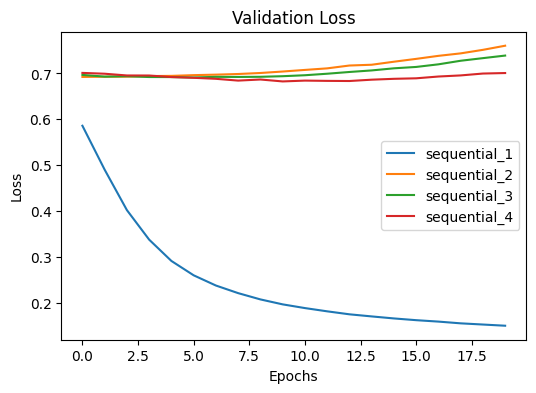

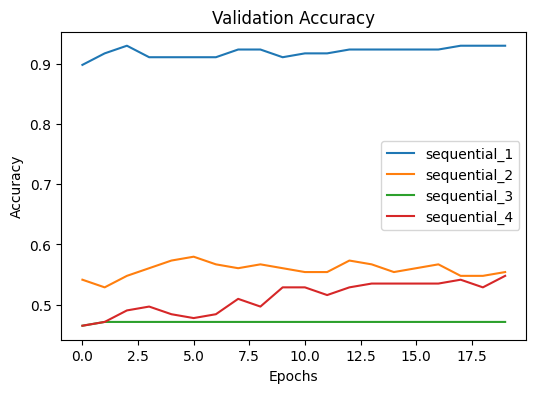

In [30]:
import matplotlib.pyplot as plt

# Data for all models
history_data = [
    {
        'model_name': 'sequential_1',
        'params': 1025538,
        'trainable_params': 1025538,
        'non_trainable_params': 0,
        'epochs': 20,
        'history': {
            'loss': [0.6324, 0.5103, 0.3992, 0.3092, 0.2443, 0.1992, 0.1683, 0.1436, 0.129, 0.1122, 0.1025, 0.0921, 0.0838, 0.0768, 0.072, 0.0654, 0.0618, 0.0555, 0.0543, 0.0506],
            'accuracy': [0.7592, 0.9233, 0.9361, 0.9453, 0.9531, 0.9616, 0.9652, 0.9695, 0.9702, 0.9751, 0.9744, 0.9801, 0.9801, 0.9822, 0.9837, 0.9844, 0.9872, 0.9908, 0.9886, 0.9901],
            'val_loss': [0.5858, 0.4899, 0.4017, 0.3373, 0.2908, 0.2595, 0.2372, 0.2206, 0.2069, 0.1961, 0.188, 0.1809, 0.1744, 0.1698, 0.1654, 0.1616, 0.1585, 0.1547, 0.1521, 0.1495],
            'val_accuracy': [0.8981, 0.9172, 0.9299, 0.9108, 0.9108, 0.9108, 0.9108, 0.9236, 0.9236, 0.9108, 0.9172, 0.9172, 0.9236, 0.9236, 0.9236, 0.9236, 0.9236, 0.9299, 0.9299, 0.9299]
        }
    },
    {
        'model_name': 'sequential_2',
        'params': 1025538,
        'trainable_params': 1025538,
        'non_trainable_params': 0,
        'epochs': 20,
        'history': {
            'loss': [0.6968, 0.675, 0.6618, 0.6442, 0.6295, 0.6168, 0.597, 0.5779, 0.5606, 0.5392, 0.5238, 0.5025, 0.4851, 0.4668, 0.4506, 0.4293, 0.4136, 0.405, 0.3902, 0.3758],
            'accuracy': [0.495, 0.6442, 0.6868, 0.745, 0.7621, 0.7685, 0.7848, 0.8018, 0.8061, 0.8189, 0.8317, 0.8395, 0.8388, 0.8558, 0.8516, 0.8686, 0.87, 0.87, 0.8722, 0.8807],
            'val_loss': [0.6923, 0.6927, 0.693, 0.6942, 0.6946, 0.6962, 0.6973, 0.6987, 0.7009, 0.7041, 0.7076, 0.711, 0.7172, 0.7189, 0.7255, 0.7317, 0.7383, 0.7437, 0.7514, 0.7604],
            'val_accuracy': [0.5414, 0.5287, 0.5478, 0.5605, 0.5732, 0.5796, 0.5669, 0.5605, 0.5669, 0.5605, 0.5541, 0.5541, 0.5732, 0.5669, 0.5541, 0.5605, 0.5669, 0.5478, 0.5478, 0.5541]
        }
    },
    {
        'model_name': 'sequential_3',
        'params': 1025538,
        'trainable_params': 1025538,
        'non_trainable_params': 0,
        'epochs': 20,
        'history': {
            'loss': [0.6933, 0.6726, 0.6579, 0.6453, 0.6285, 0.6137, 0.5989, 0.5802, 0.5635, 0.5434, 0.5226, 0.509, 0.488, 0.4715, 0.4553, 0.4365, 0.4238, 0.4100, 0.3956, 0.3826],
            'accuracy': [0.5128, 0.6172, 0.6541, 0.6967, 0.7344, 0.7607, 0.7805, 0.7855, 0.7926, 0.8111, 0.8224, 0.8274, 0.8445, 0.8402, 0.8352, 0.8516, 0.8565, 0.8587, 0.8565, 0.8565],
            'val_loss': [0.6967, 0.693, 0.6938, 0.6921, 0.692, 0.6911, 0.6925, 0.6923, 0.6926, 0.6939, 0.696, 0.6993, 0.7031, 0.7065, 0.7111, 0.7141, 0.7198, 0.7276, 0.7333, 0.7389],
            'val_accuracy': [0.465, 0.4713, 0.4713, 0.4713, 0.4713, 0.4713, 0.4713, 0.4713, 0.4713, 0.4713, 0.4713, 0.4713, 0.4713, 0.4713, 0.4713, 0.4713, 0.4713, 0.4713, 0.4713, 0.4713]
        }
    },
    {
        'model_name': 'sequential_4',
        'params': 1025538,
        'trainable_params': 1025538,
        'non_trainable_params': 0,
        'epochs': 20,
        'history': {
            'loss': [0.6956, 0.6782, 0.6618, 0.6455, 0.6322, 0.6162, 0.5962, 0.5796, 0.5606, 0.5395, 0.5182, 0.4999, 0.4801, 0.4654, 0.4503, 0.4282, 0.4126, 0.3953, 0.3876, 0.3715],
            'accuracy': [0.4915, 0.5781, 0.6534, 0.7124, 0.7436, 0.7692, 0.7919, 0.8061, 0.8125, 0.8281, 0.8324, 0.8381, 0.8445, 0.8388, 0.8366, 0.8558, 0.8516, 0.8601, 0.8509, 0.8615],
            'val_loss': [0.7011, 0.6993, 0.6955, 0.6954, 0.692, 0.6904, 0.6882, 0.6843, 0.6867, 0.6825, 0.6843, 0.6837, 0.6834, 0.6863, 0.6882, 0.6893, 0.6932, 0.6956, 0.6997, 0.7008],
            'val_accuracy': [0.465, 0.4713, 0.4904, 0.4968, 0.4841, 0.4777, 0.4841, 0.5096, 0.4968, 0.5287, 0.5287, 0.5159, 0.5287, 0.535, 0.535, 0.535, 0.535, 0.5414, 0.5287, 0.5478]
        }
    }
]

# Plotting the training loss
plt.figure(figsize=(6, 4))
for history in history_data:
    plt.plot(history['history']['loss'], label=history['model_name'])

plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training accuracy
plt.figure(figsize=(6, 4))
for history in history_data:
    plt.plot(history['history']['accuracy'], label=history['model_name'])

plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the validation loss
plt.figure(figsize=(6, 4))
for history in history_data:
    plt.plot(history['history']['val_loss'], label=history['model_name'])

plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the validation accuracy
plt.figure(figsize=(6, 4))
for history in history_data:
    plt.plot(history['history']['val_accuracy'], label=history['model_name'])

plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




# **`Comments:`**

The accuracy scores exhibit a mixed performance, with initial sets reflecting consistent and stable results at 0.9335 and 0.9258. However, a notable drop occurs in subsequent sets, reaching 0.4859 and 0.4629, suggesting potential issues in generalization.
The alternating pattern of high and low accuracies (e.g., 0.5038) raises concerns about model stability. These fluctuations may indicate challenges like overfitting or underfitting, where the model struggles to generalize or is too simplistic.
Further investigation into learning curves, validation performance, and potential class imbalances in the dataset is crucial.  

`The mean accuracy of 66.24%` provides a central tendency measure for the model's overall performance, indicating that, on average, the model correctly predicts the target variable for approximately two-thirds of the instances.

However, the `wide standard deviation of 21.86%` suggests a considerable degree of variability or inconsistency in the accuracy scores.

The high standard deviation indicates that the accuracy scores diverge significantly from the mean, reinforcing the observations made from the individual accuracy values. The model's performance exhibits substantial fluctuations, as evidenced by the alternating pattern of high and low accuracies in different sets.

Among the four sequential models evaluated, `Sequential 1 emerges as the most robust and promising architecture`. With the lowest training and validation losses, this model showcases consistent improvement, reaching an impressive training accuracy of approximately 99% and a validation accuracy of around 93% by the end of the 20 epochs. Its performance suggests effective learning and excellent generalization to unseen data.
In contrast, Sequential 2 also exhibits steady progress, albeit at a slightly lower accuracy level. However, Sequential 3 and Sequential 4 display more erratic behavior with fluctuations in both training and validation metrics. While Sequential 2 holds promise as a reliable alternative, Sequential 1 stands out as the superior choice, emphasizing the importance of a well-structured and optimized neural network architecture in achieving superior classification performance. Further exploration, including hyperparameter tuning and regularization techniques, may enhance the models' overall performance.

In summary, while the model displays consistency in some instances, the varying performance hints at underlying complexities that necessitate a closer examination of the training process and potential adjustments to enhance overall model robustness and generalization capabilities.
